In [12]:
%matplotlib inline 
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.cluster import KMeans, DBSCAN 
from sklearn.mixture import GMM 
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import hamming, euclidean
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np


In [2]:
## import data for poems (starting with 5,000 features)
V = pd.read_csv('Poems/Poem_Features_Vectorize.txt',sep=',',header = None)
N2 = pd.read_csv('Poems/Poem_Features_ngram2.txt',sep=',',header = None)
N4 = pd.read_csv('Poems/Poem_Features_ngram4.txt',sep=',',header = None)


In [3]:
## Standardizing
def standardize(X):
    return StandardScaler().fit_transform(X)

data = [V, N2, N4]
data = [standardize(X) for X in data]
titles = ['Vect', 'N-Gram 2', 'N-Gram 4']

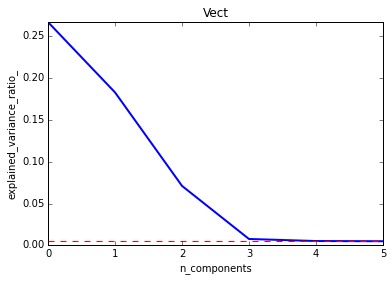


None


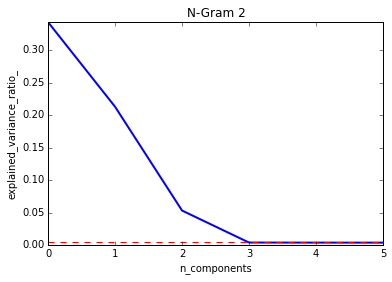


None


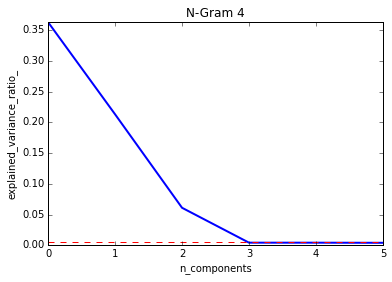


None


In [4]:
## Extract principal components , looking at variance explained of n components
# Using PCA
def getPCAPlot(X, title):
    pca = PCA()
    pca.fit(X)
    X_pca = pca.transform(X)

    # Plot the PCA spectrum
    plt.plot(pca.explained_variance_ratio_, linewidth=2)
    plt.axis('tight')
    plt.title(title)
    plt.xlabel('n_components')
    plt.ylabel('explained_variance_ratio_')
    plt.axhline(y=0.005, color="red", linestyle="--")
    plt.xlim(0,5)
    plt.show()
    print('')

# do for all data
for i in range(len(data)):
    print(getPCAPlot(data[i], titles[i]))

    
## results show that we need only 3 components  

In [44]:
## Trying n components
def getPCA(X, n=3):
    pca = PCA(n)
    pca.fit(X)
    return pca.transform(X)

### function to fit KMeans, GMM, DBSCAN
def getKM(X, k):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=10000, n_init=30)
    km.fit(X)
    klabels = km.labels_
    kcentroids = km.cluster_centers_

    ## plot K-Means
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(k):
        # plot data points
        dplt = X[np.where(klabels==i)]
        ax.plot(dplt[:,0],dplt[:,1],dplt[:,2],'o')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')
    plt.show()
    return km

def getGMM(X, k):
    gmm = GMM(n_components=k, n_init=30, covariance_type='full')
    gmm.fit(X)
    glabels = gmm.predict(X)
    gmeans = gmm.means_
    gcovar = gmm.covars_

    ## plot GMM
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(k):
        # plot data points
        dplt = X[np.where(glabels==i)]
        plt.plot(dplt[:,0],dplt[:,1],dplt[:,2],'o')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')
    plt.show()
    return gmm

def getDBS(X):
    dbs = DBSCAN()
    dbs.fit(X)
    dlabels = dbs.labels_
    dk = dlabels.max()

    ## plot DBSCAN
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(dk):
        # plot data points
        dplt = X[np.where(dlabels==i)]
        plt.plot(dplt[:,0],dplt[:,1],dplt[:,2],'o')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')
    plt.show()
    return dbs


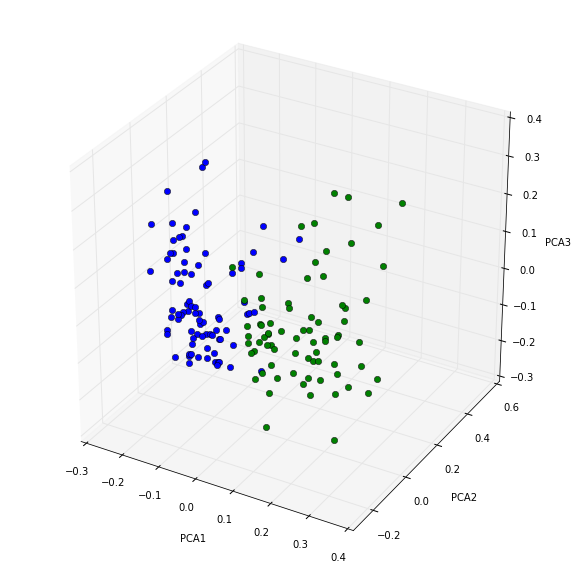

KMeans(copy_x=True, init='k-means++', max_iter=10000, n_clusters=2, n_init=30,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


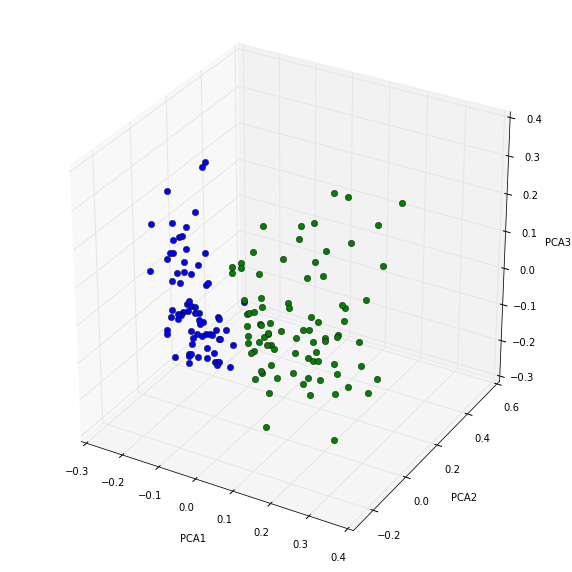

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=30, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)


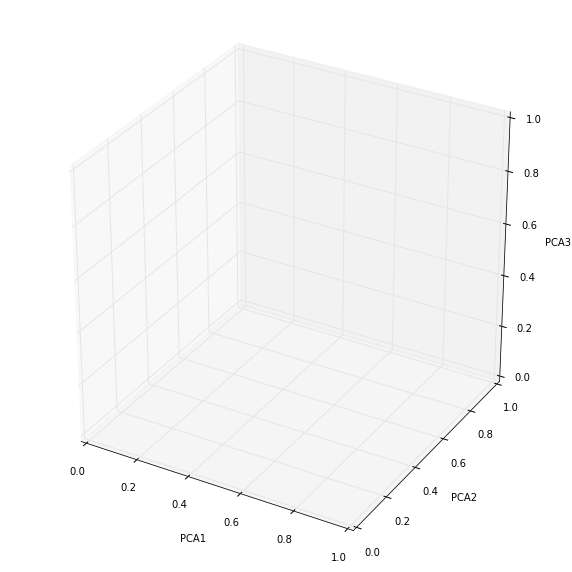

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=5, p=None, random_state=None)


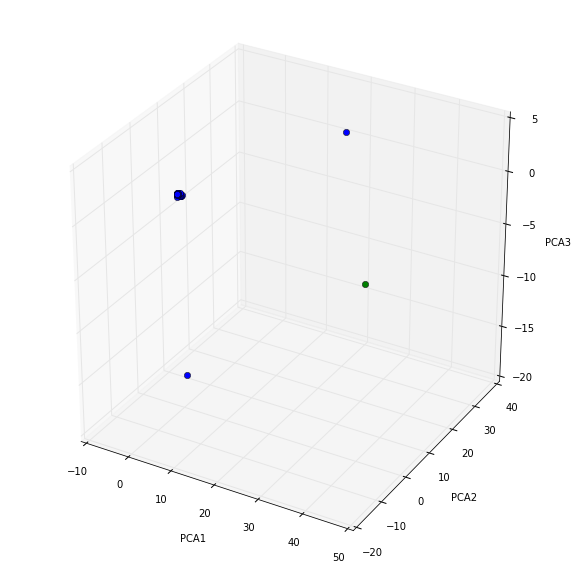

KMeans(copy_x=True, init='k-means++', max_iter=10000, n_clusters=2, n_init=30,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


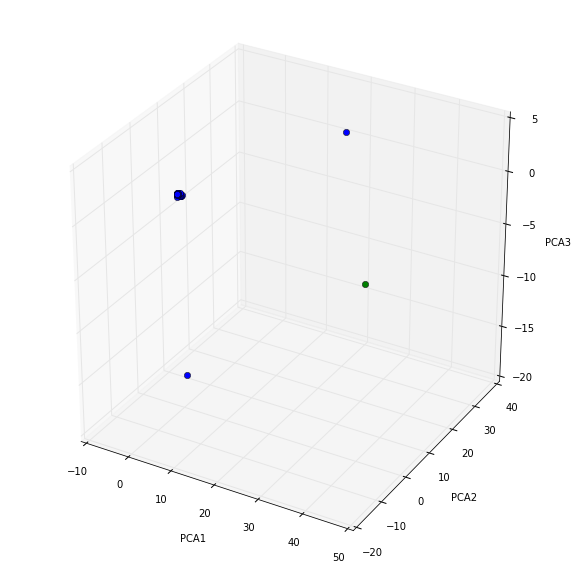

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=30, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)


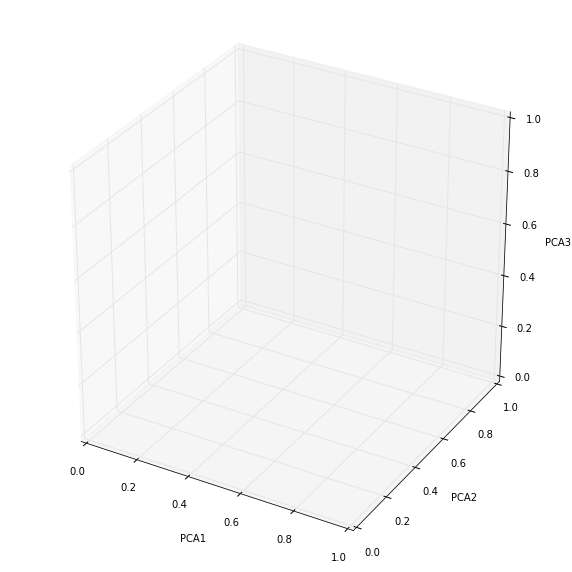

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=5, p=None, random_state=None)


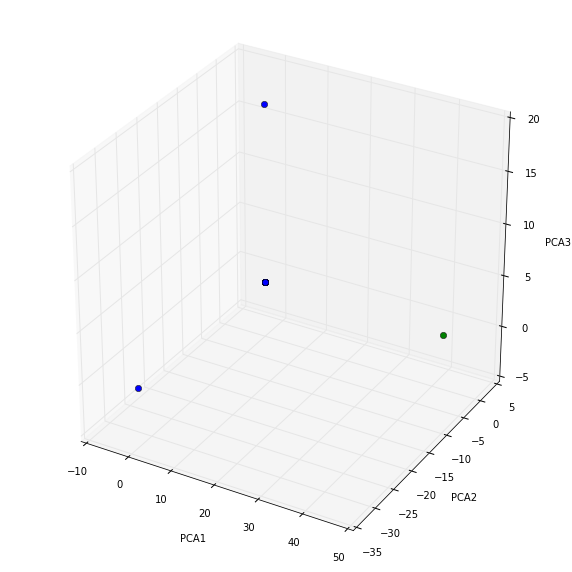

KMeans(copy_x=True, init='k-means++', max_iter=10000, n_clusters=2, n_init=30,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


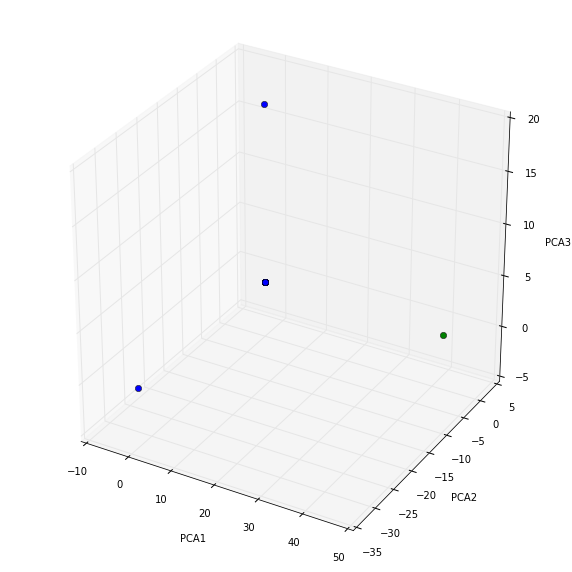

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=30, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)


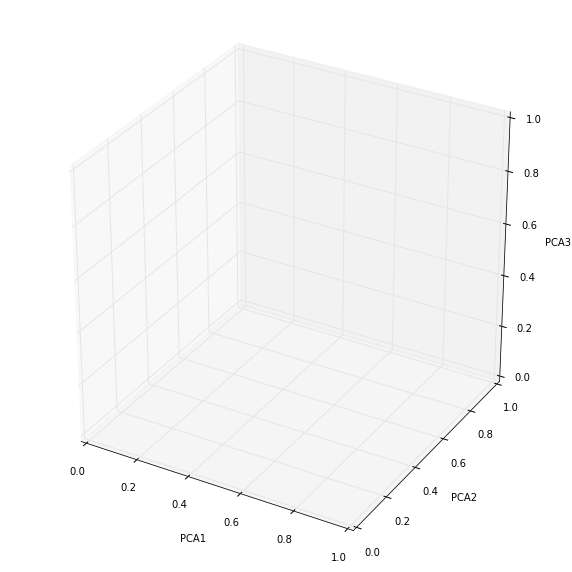

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    min_samples=5, p=None, random_state=None)


In [46]:
for X in [V, N2, N4]:
    ### PCA
    X = getPCA(X, n=3)
    k = 2

    ### K-Means cluster
    print(getKM(X,k))

    ### GMM with covariance_type = full 
    print(getGMM(X,k))

    ### DBSCAN 
    print(getDBS(X))


In [26]:
## Silhouette calculation & plot
## Adapted from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
import matplotlib.cm as cm

## function to generate list of silhouettes
def findSilh(km, X):
    k = km.n_clusters
    clusters = []
    points = {}
    for i in range(k):
        clusters.append(km.cluster_centers_[i])
        ps = X[np.where(km.labels_==i)]
        points[i] = [np.array(p) for p in ps]
    all_silhs = []

    # loop all clusters
    for c in range(k):
        cluster = clusters[c]
        other_clusters = clusters[:c] + clusters[c+1:]
        silhs = [] #create empty list for silhouettes

        # loop all points in clusters
        for i in range(len(points[c])):
            point = points[c][i]
            others = points[c][:i] + points[c][i+1:]

            # get a(i) -- find average hamming distance between a(i) and other q points in the same cluster
            sum = 0
            for q in others:
                sum += euclidean(point, q)
            a = sum / len(others)

            # get b(i) -- find lowest average hamming distance between a(i) to q points in other clusters
            b_list = []
            for d in other_clusters: #find average hamming distance to each other cluster
                sum = 0
                for q in d:
                    sum += euclidean(point, q)
                avg_dist = sum / len(d)
                b_list.append(avg_dist) #add to list
            b = min(b_list) #get the lowest one

            # calculate silhouette
            silh = (b - a) / max(a, b)
            silhs.append(silh) #add to list
        silhs.sort() #sort
        all_silhs.append(silhs) #add to list of all clusters
    return all_silhs

## function to plot
def plotSilh(s):
    with plt.style.context('ggplot'):
        fig = plt.figure()
        n = len(s)
        y_lower = 10
        silh_avg = np.mean([x for list in s for x in list])
        for i in range(n): 
            cls = s[i]
            size = len(cls)
            y_upper = y_lower + size
            color = cm.spectral(float(i) / n)
            plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cls, facecolor=color, edgecolor=color, alpha=0.7)
            plt.text(-0.05, y_lower + 0.5 * size, str(i))
            y_lower = y_upper + 10

        plt.title('Silhouette plot K = ' + str(n))
        plt.xlabel('Silhouette Coefficient Values')
        plt.ylabel('Cluster Label')
        plt.axvline(x=silh_avg, color="red", linestyle="--")
        plt.yticks([])  
        plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.show()
    return "At K = " + str(n) + ", Average Silhouette Score = " + str(silh_avg)


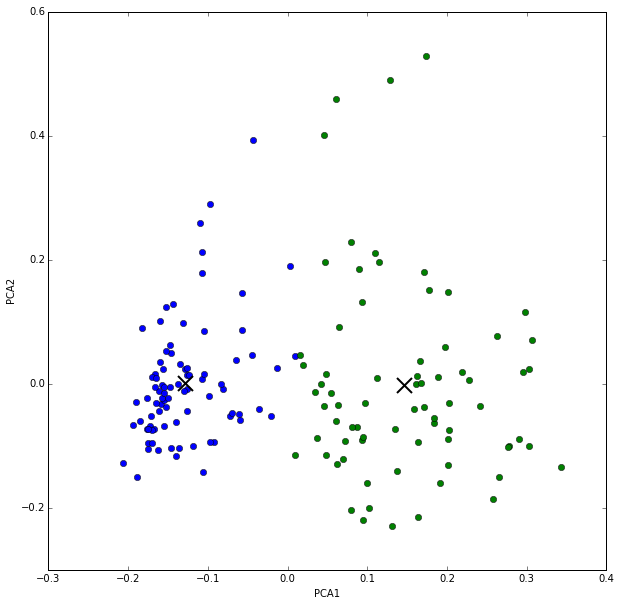

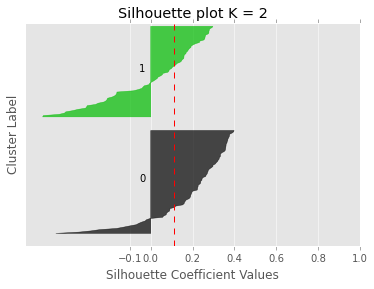

At K = 2, Average Silhouette Score = 0.110756450917


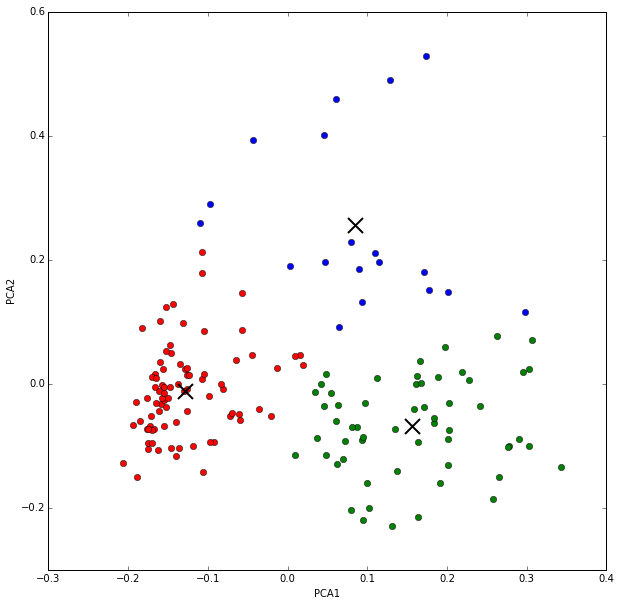

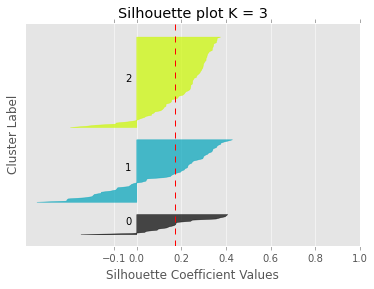

At K = 3, Average Silhouette Score = 0.17298072855


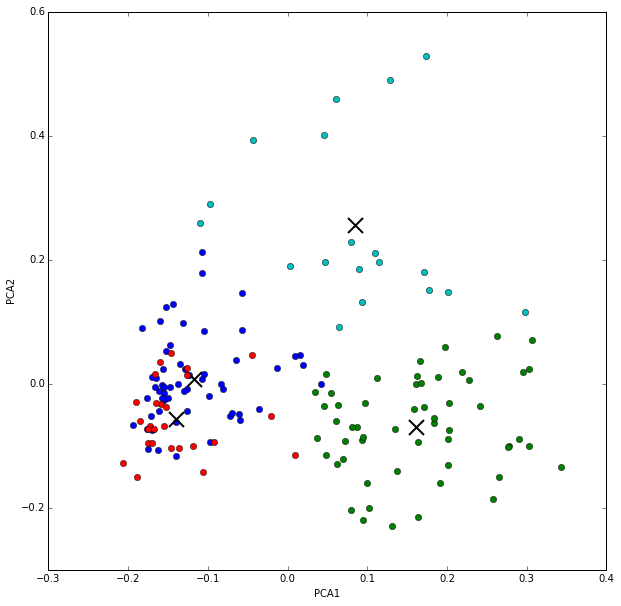

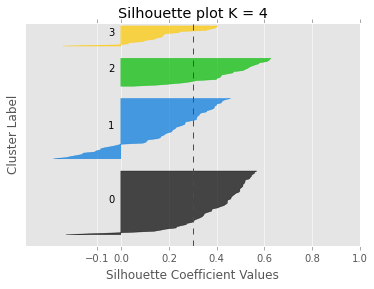

At K = 4, Average Silhouette Score = 0.301397051902


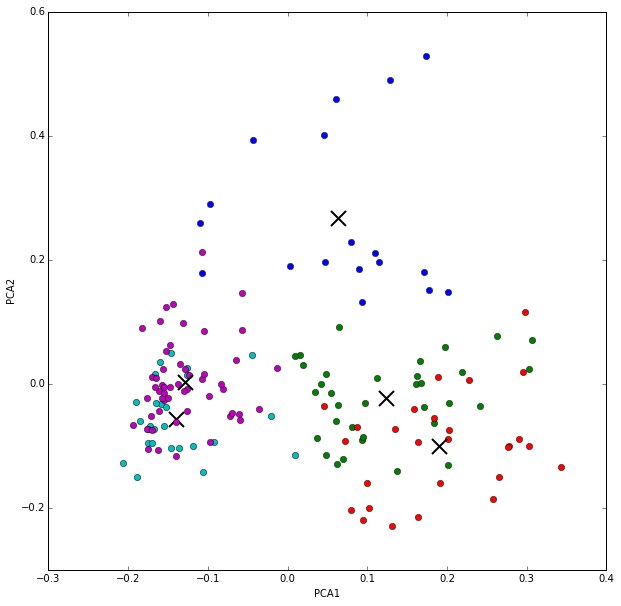

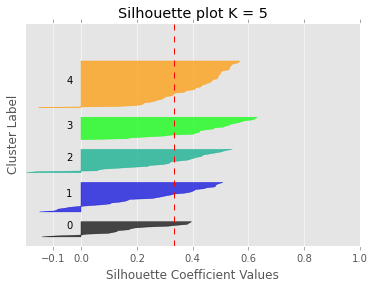

At K = 5, Average Silhouette Score = 0.332530809927


In [27]:
### Evaluate KMeans cluster performance of each K choice (2 to 5) using Silhouette plot
n_k = [2, 3, 4, 5]
for k in n_k:
    X = getPCA(V, n=3)
    km = getKM(X, k)
    print(plotSilh(findSilh(km, X)))
